In [1]:
import pandas as pd
from pysal.lib import weights
from scipy.sparse import csr_matrix
import scipy

In [10]:



### csr_matrix稀疏矩阵共有属性
  # 矩阵形状 shape
  # 数据类型 dtype
  # 矩阵维度 ndim
  # 非零个数 nnz
  # 非零值, 一维数组 data

### COO 特有的
  # 矩阵行索引 row
  # 矩阵列索引 col

# 从CSV文件中读取空间权重矩阵
csv_path = "D:\Lenovo\Desktop\云南大学\大创\程序代码\空间权重矩阵测试\高斯权函数矩阵.csv"
spatial_weights_df = pd.read_csv(csv_path, index_col=0) #csv转dataframe

sparse_matrix=scipy.sparse.csr_matrix(spatial_weights_df.values)

# 创建空间权重对象,WSP 类是pysal中的一个子类，表示"weights spatial",专用于表示处理空间权重矩阵的子类
wsp = weights.WSP(sparse_matrix)
#WSP无法直接参与Moran'I指数计算，所以需要将它转为w类
w=weights.W.from_WSP(wsp)
w.transform = 'r' #对空间权重矩阵进行行标准化
print(type(w))

# 如果权重矩阵是对称的，可以使用Sym的子类
# w = weights.WSP(symmetrize='True', values=spatial_weights_df.values)

# 打印空间权重矩阵
print(w.sparse)


<class 'libpysal.weights.weights.W'>
  (0, 0)	1.0
  (0, 1)	0.9976850411986142
  (0, 2)	0.9949688434478914
  (0, 3)	0.9953381775433456
  (0, 4)	0.917702155990408
  (0, 5)	0.9884491023615344
  (0, 6)	0.9715349451818324
  (0, 7)	0.9972287629681184
  (0, 8)	0.9754722053678642
  (0, 9)	0.9449566222528648
  (0, 10)	0.986085913273798
  (0, 11)	0.9543217013024128
  (0, 12)	0.9676202384865428
  (0, 13)	0.9848420162805956
  (0, 14)	0.8963472818079518
  (0, 15)	0.8827718023697354
  (0, 16)	0.9494600894481572
  (0, 17)	0.9258932413329678
  (0, 18)	0.8439063942511318
  (0, 19)	0.8197614639699042
  (0, 20)	0.8144062040401563
  (0, 21)	0.8366543018177395
  (0, 22)	0.7793754117042352
  (0, 23)	0.9429445865170032
  (0, 24)	0.9424533743006496
  :	:
  (128, 104)	0.0471945617400746
  (128, 105)	0.7232223290061264
  (128, 106)	0.7209679305384177
  (128, 107)	0.6073435439685264
  (128, 108)	0.6974665026819645
  (128, 109)	0.5644103611841405
  (128, 110)	0.5172713464269173
  (128, 111)	0.6167637740553066
  (

In [8]:
csv_path = "D:\Lenovo\Desktop\云南大学\大创\程序代码\空间权重矩阵测试\反距离权函数矩阵.csv"
spatial_weights_df = pd.read_csv(csv_path, index_col=0) #csv转dataframe

sparse_matrix=scipy.sparse.csr_matrix(spatial_weights_df.values)

# 创建空间权重对象,WSP 类是pysal中的一个子类，表示"weights spatial",专用于表示处理空间权重矩阵的子类
wsp = weights.WSP(sparse_matrix)
#WSP无法直接参与Moran'I指数计算，所以需要将它转为w类
w=weights.W.from_WSP(wsp)
w.transform = 'r' #对空间权重矩阵进行行标准化
print(type(w))

# 如果权重矩阵是对称的，可以使用Sym的子类
# w = weights.WSP(symmetrize='True', values=spatial_weights_df.values)

# 打印空间权重矩阵
print(w.sparse)

<class 'libpysal.weights.weights.W'>
  (0, 235)	0.011369858803921412
  (0, 362)	0.007120894496249617
  (0, 685)	0.007428291103132868
  (0, 686)	0.007335153277742809
  (0, 1238)	0.01617556937257658
  (0, 1867)	0.016228805102503217
  (0, 1868)	0.015565429153785006
  (0, 1948)	0.0076957804125229725
  (0, 1990)	0.007417631809478341
  (0, 2232)	0.011915990680356824
  (0, 2233)	0.012233884525281066
  (0, 2234)	0.011848952292126364
  (0, 2333)	0.015464725165822766
  (0, 2334)	0.014654770441302995
  (0, 2335)	0.01495470941855992
  (0, 2370)	0.007544009347629761
  (0, 2431)	0.011236376685063354
  (0, 2500)	0.007254854864638809
  (0, 2569)	0.01130493219297718
  (0, 2610)	0.007284076477125596
  (0, 2611)	0.007184268384594676
  (0, 2673)	0.011656274891420942
  (0, 2675)	0.011641820564939752
  (0, 2701)	0.020753433816018064
  (0, 2742)	0.007550855639690759
  :	:
  (8493, 5118)	0.005251836728662198
  (8493, 5240)	0.005409269733448239
  (8493, 5241)	0.005346649780299158
  (8493, 5242)	0.0052912402599

Moran's I: 0.15689935200494257
P-value: 0.001
Z-score: 63.74361955457653


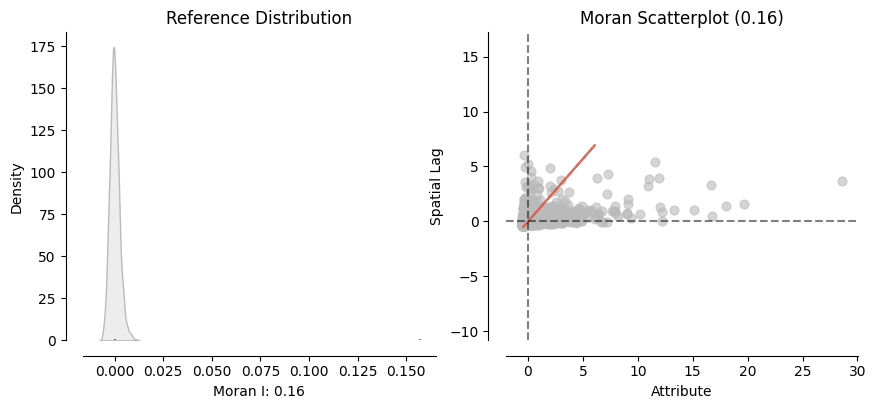

In [9]:
import geopandas as gpd
from pysal.explore import esda
from splot.esda import plot_moran
import matplotlib.pyplot as plt

shapefile_path = "F:\大创数据\中间产出的数据\云南省和黄淮海平原已处理好的火点\云南省逐月火点\云南省已处理好的火点_1月.shp"
gdf = gpd.read_file(shapefile_path)
moran = esda.Moran(gdf['FRP'], w)


# 输出莫兰指数和p值
print('Moran\'s I:', moran.I)
print('P-value:', moran.p_sim)
print('Z-score:', moran.z_sim)



# 绘制莫兰散点图
plot_moran(moran, zstandard=True, figsize=(10, 4))
plt.show()